# Lei de Moore
https://numpy.org/numpy-tutorials/content/mooreslaw-tutorial.html
## csv
https://ourworldindata.org/grapher/transistors-per-microprocessor?tab=table


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
os.getcwd()

'C:\\Users\\flavio.codeco.coelho'

In [5]:
A_M = np.log(2) / 2
B_M = np.log(2250) - A_M * 1971
Moores_law = lambda year: np.exp(B_M) * np.exp(A_M * year)

In [6]:
ML_1971 = Moores_law(1971)
ML_1973 = Moores_law(1973)
print("In 1973, G. Moore expects {:.0f} transistors on Intels chips".format(ML_1973))
print("This is x{:.2f} more transistors than 1971".format(ML_1973 / ML_1971))

In 1973, G. Moore expects 4500 transistors on Intels chips
This is x2.00 more transistors than 1971


In [7]:
Moores_law(1975)

8999.9999999997

In [16]:
data = np.loadtxt("transistors-per-microprocessor.csv", delimiter=",", usecols=[2,3],skiprows=1)
data

array([[1.9710000e+03, 2.3082417e+03],
       [1.9720000e+03, 3.5545222e+03],
       [1.9740000e+03, 6.0975625e+03],
       [1.9790000e+03, 2.9163777e+04],
       [1.9820000e+03, 1.3577272e+05],
       [1.9850000e+03, 2.7384194e+05],
       [1.9860000e+03, 2.7384194e+05],
       [1.9880000e+03, 2.7384194e+05],
       [1.9890000e+03, 1.2079008e+06],
       [1.9900000e+03, 1.2079008e+06],
       [1.9920000e+03, 3.1059002e+06],
       [1.9930000e+03, 3.1059002e+06],
       [1.9940000e+03, 3.1059002e+06],
       [1.9950000e+03, 9.6466160e+06],
       [1.9960000e+03, 9.6466160e+06],
       [1.9970000e+03, 9.6466160e+06],
       [1.9980000e+03, 1.5261378e+07],
       [1.9990000e+03, 2.1673922e+07],
       [2.0000000e+03, 3.7180264e+07],
       [2.0010000e+03, 4.2550656e+07],
       [2.0020000e+03, 2.2067340e+08],
       [2.0030000e+03, 2.2067340e+08],
       [2.0040000e+03, 2.7384200e+08],
       [2.0050000e+03, 3.0505277e+08],
       [2.0060000e+03, 5.8294160e+08],
       [2.0070000e+03, 8.

In [17]:
year = data[:, 0]  # grab the second column and assign
transistor_count = data[:, 1]  # grab the first column and assign

print("year:\t\t", year[:10])
print("trans. cnt:\t", transistor_count[:10])

year:		 [1971. 1972. 1974. 1979. 1982. 1985. 1986. 1988. 1989. 1990.]
trans. cnt:	 [   2308.2417    3554.5222    6097.5625   29163.777   135772.72
  273841.94    273841.94    273841.94   1207900.8    1207900.8   ]


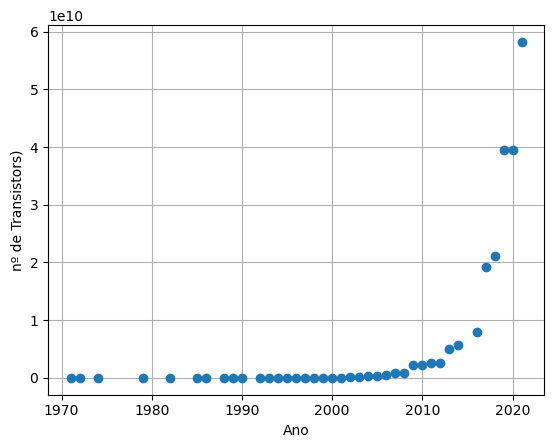

In [18]:
plt.plot(year, transistor_count, 'o')
plt.xlabel('Ano')
plt.grid()
plt.ylabel('nº de Transistors)');

In [19]:
yi = np.log(transistor_count)
yi

array([ 7.74424134,  8.17597593,  8.71564438, 10.2806827 , 11.81873759,
       12.52030636, 12.52030636, 12.52030636, 14.00439453, 14.00439453,
       14.94881415, 14.94881415, 14.94881415, 16.08211774, 16.08211774,
       16.08211774, 16.54083588, 16.89162034, 17.43128864, 17.56620583,
       19.21219434, 19.21219434, 19.42806186, 19.53599534, 20.18359757,
       20.5073985 , 20.5073985 , 21.55975177, 21.55975177, 21.67877728,
       21.67877728, 22.33270375, 22.46373201, 22.80270738, 23.67817612,
       23.77253888, 24.39956651, 24.39956651, 24.78715119])

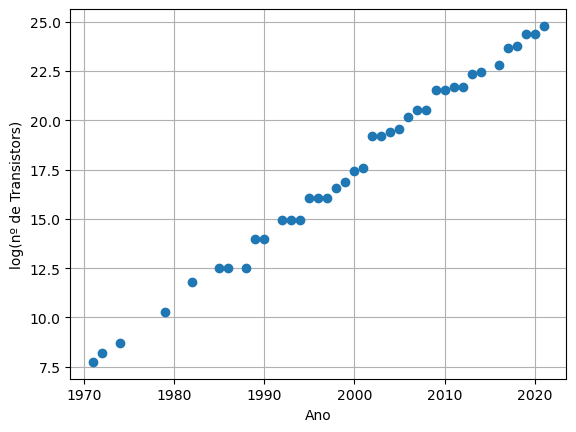

In [20]:
plt.plot(year, yi, 'o')
plt.xlabel('Ano')
plt.grid()
plt.ylabel('log(nº de Transistors)');

In [23]:
Moores_law(1990)

14.303583710517955

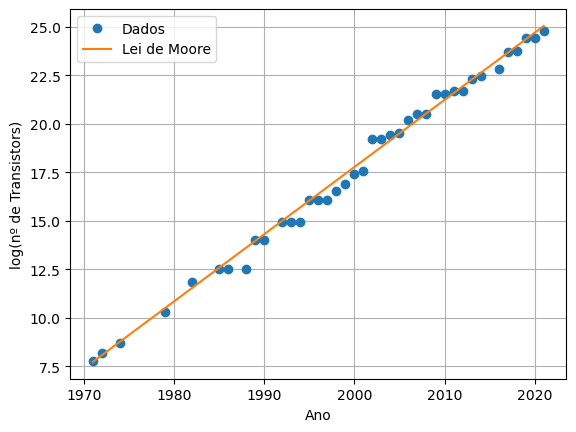

In [27]:
plt.plot(year, yi, 'o', label="Dados")
plt.plot(year, [np.log(Moores_law(y)) for y in year], label="Lei de Moore")
plt.xlabel('Ano')
plt.grid()
plt.legend()
plt.ylabel('log(nº de Transistors)');

In [28]:
model = np.polynomial.Polynomial.fit(year, yi, deg=1)
model2 = np.polynomial.Polynomial.fit(year, yi, deg=2)

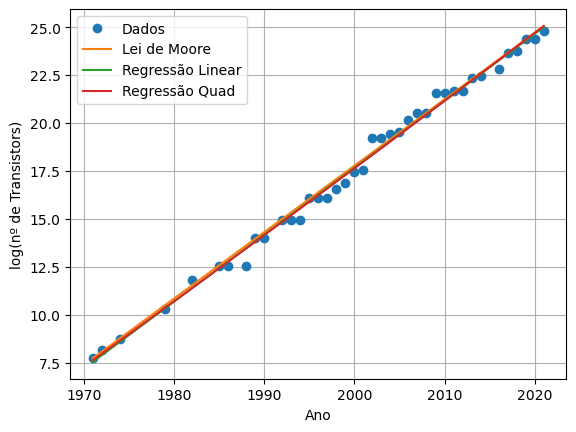

In [31]:
plt.plot(year, yi, 'o', label="Dados")
plt.plot(year, [np.log(Moores_law(y)) for y in year], label="Lei de Moore")
plt.plot(year, [model(y) for y in year],label="Regressão Linear")
plt.plot(year, [model2(y) for y in year],label="Regressão Quad")
plt.xlabel('Ano')
plt.grid()
plt.legend()
plt.ylabel('log(nº de Transistors)');

In [30]:
model(1990)

14.170234006738887

In [52]:
def sse(m):
    if m == Moores_law:
        sse = sum([(i-np.log(m(y)))**2 for i,y in zip(yi,year)])
    else:
        sse = sum([(i-m(y))**2 for i,y in zip(yi,year)])
    return sse

In [53]:
sse(Moores_law)

5.930788153608517

In [54]:
sse(model)

5.442800894213333

In [55]:
sse(model2)

5.396579114616761

In [56]:
errors = np.array([sse(m) for m in [Moores_law, model, model2
                                   ]])
errors

array([5.93078815, 5.44280089, 5.39657911])

In [57]:
errors.argmin()

2

In [59]:
def errors(m):
    if m == Moores_law:
        return np.array([(i-np.log(m(y)))**2 for i,y in zip(yi,year)])
    else:
        return np.array([(i-m(y))**2 for i,y in zip(yi,year)])

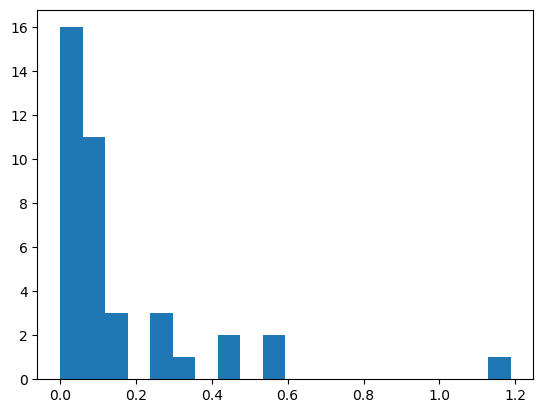

In [60]:
plt.hist(errors(Moores_law), bins=20, label="Lei de Moore");

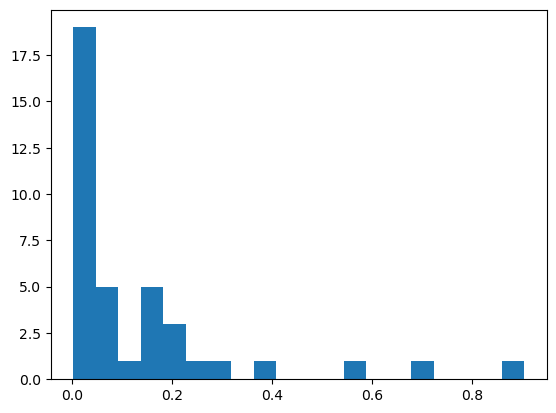

In [61]:
plt.hist(errors(model), bins=20, label="Linear");

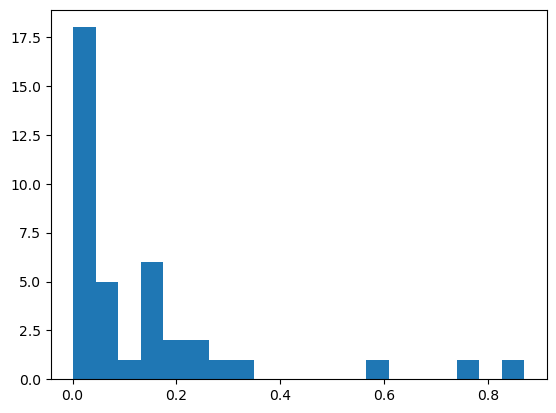

In [62]:
plt.hist(errors(model2), bins=20, label="Linear");

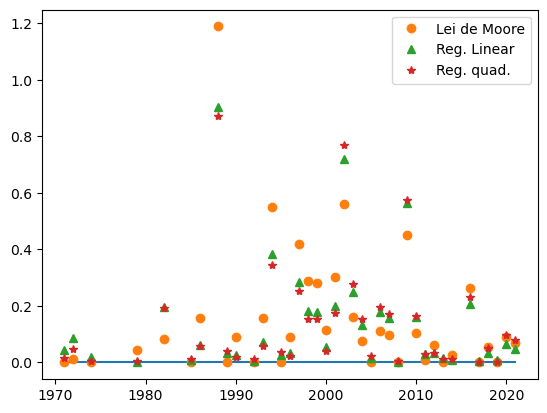

In [69]:
plt.plot(year,np.zeros(len(year)))
plt.plot(year,errors(Moores_law), 'o', label="Lei de Moore");
plt.plot(year,errors(model), '^', label="Reg. Linear");
plt.plot(year,errors(model2), '*', label="Reg. quad.");
plt.legend();